Checking for missing values:
Date                 0
Temperature (°C)     0
Humidity (%)         0
Wind Speed (km/h)    0
Rainfall (mm)        0
dtype: int64 

Monthly Average Temperatures:
     Month  Temperature (°C)
0  January             15.54 



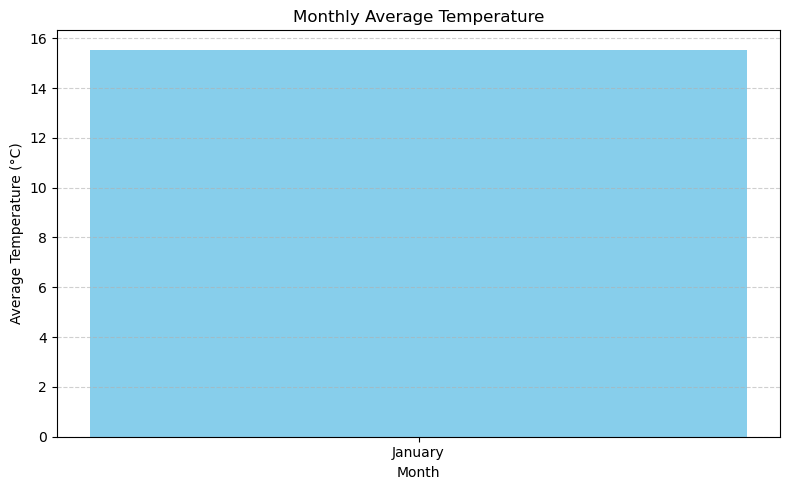

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Date': [
        '01-01-2025', '02-01-2025', '03-01-2025', '04-01-2025', '05-01-2025',
        '06-01-2025', '07-01-2025', '08-01-2025', '09-01-2025', '10-01-2025'
    ],
    'Temperature (°C)': [15.2, 16.8, 14.5, 15.3, 17.6, 18.1, 16.2, 12.4, 13.8, 15.5],
    'Humidity (%)': [80, 75, 85, 90, 70, 65, 78, 88, 83, 79],
    'Wind Speed (km/h)': [10.5, 8, 12, 15.2, 7.4, 6, 9.1, 14.3, 11.5, 10],
    'Rainfall (mm)': [0, 0, 1.2, 5.4, 0, 0, 0.5, 2.1, 0, 0]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

print("Checking for missing values:")
print(df.isnull().sum(), "\n")

df.ffill(inplace=True)

df['Month'] = df['Date'].dt.strftime('%B')
monthly_avg_temp = df.groupby('Month')['Temperature (°C)'].mean().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_temp['Month'] = pd.Categorical(monthly_avg_temp['Month'], categories=month_order, ordered=True)
monthly_avg_temp.sort_values('Month', inplace=True)

print("Monthly Average Temperatures:")
print(monthly_avg_temp, "\n")

plt.figure(figsize=(8, 5))
plt.bar(monthly_avg_temp['Month'], monthly_avg_temp['Temperature (°C)'], color='skyblue')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

data = {
    'Student ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice Brown', 'Ben Carter', 'Clara Davis', 'David Evans', 'Eva Foster',
             'Frank Green', 'Grace Hall', 'Henry Ives', 'Isla Jones', 'Jack King'],
    'Maths': [85, 78, 92, 65, 74, 60, 88, 70, 95, 82],
    'Physics': [88, 75, 94, 68, 78, 55, 85, 72, 96, 80],
    'Chemistry': [87, 80, 90, 66, 76, 58, 86, 74, 94, 78]
}

df = pd.DataFrame(data)

# a. Summary statistics for each subject
print("Summary Statistics:")
print(df[['Maths', 'Physics', 'Chemistry']].describe(), "\n")

# b. Average score for each student
df['Average Score'] = df[['Maths', 'Physics', 'Chemistry']].mean(axis=1)
print("Student Average Scores:")
print(df[['Student ID', 'Name', 'Average Score']], "\n")

# c. Students scoring below 60 in more than two subjects
def count_below_60(row):
    return sum(score < 60 for score in [row['Maths'], row['Physics'], row['Chemistry']])

df['Subjects < 60'] = df.apply(count_below_60, axis=1)
at_risk_students = df[df['Subjects < 60'] > 2]

print("Students scoring below 60 in more than two subjects:")
print(at_risk_students[['Student ID', 'Name', 'Maths', 'Physics', 'Chemistry']])


Summary Statistics:
           Maths    Physics  Chemistry
count  10.000000  10.000000  10.000000
mean   78.900000  79.100000  78.900000
std    11.618472  12.449453  11.080012
min    60.000000  55.000000  58.000000
25%    71.000000  72.750000  74.500000
50%    80.000000  79.000000  79.000000
75%    87.250000  87.250000  86.750000
max    95.000000  96.000000  94.000000 

Student Average Scores:
   Student ID         Name  Average Score
0         101  Alice Brown      86.666667
1         102   Ben Carter      77.666667
2         103  Clara Davis      92.000000
3         104  David Evans      66.333333
4         105   Eva Foster      76.000000
5         106  Frank Green      57.666667
6         107   Grace Hall      86.333333
7         108   Henry Ives      72.000000
8         109   Isla Jones      95.000000
9         110    Jack King      80.000000 

Students scoring below 60 in more than two subjects:
Empty DataFrame
Columns: [Student ID, Name, Maths, Physics, Chemistry]
Index: []


Summary Statistics for Departure Delays:
count    10.000000
mean     21.000000
std      19.692074
min       0.000000
25%       6.250000
50%      17.500000
75%      28.750000
max      60.000000
Name: Departure Delay (minutes), dtype: float64 

Average Delay Per Airline:
     Airline  Departure Delay (minutes)
0   American                      52.50
1      Delta                      11.25
2  Southwest                       0.00
3     United                      20.00 

Most Common Origin: JFK
Most Common Destination: ORD



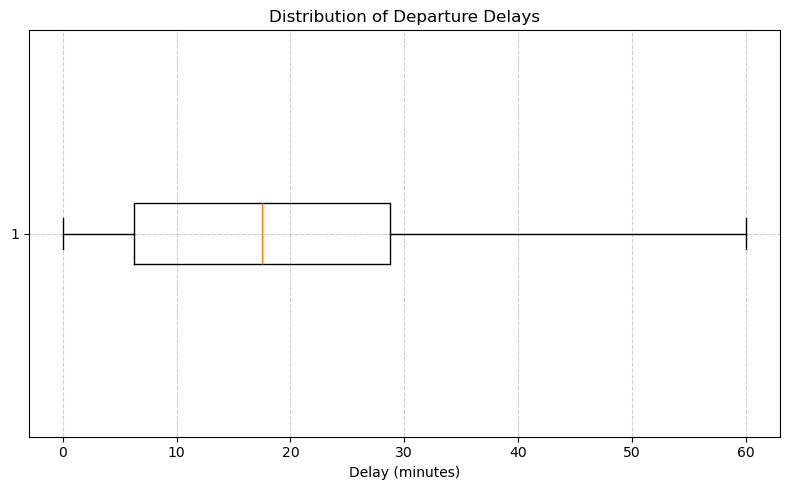

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Flight Number': ['F101', 'F102', 'F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F110'],
    'Airline': ['Delta', 'United', 'Delta', 'American', 'United', 'Delta', 'American', 'Southwest', 'United', 'Delta'],
    'Origin': ['JFK', 'LAX', 'JFK', 'ORD', 'ATL', 'JFK', 'ORD', 'ATL', 'LAX', 'JFK'],
    'Destination': ['LAX', 'ORD', 'ATL', 'JFK', 'ORD', 'ATL', 'LAX', 'JFK', 'ATL', 'ORD'],
    'Departure Delay (minutes)': [15, 30, 0, 45, 10, 5, 60, 0, 20, 25]
}

df = pd.DataFrame(data)

# a. Summary statistics for departure delays
print("Summary Statistics for Departure Delays:")
print(df['Departure Delay (minutes)'].describe(), "\n")

# b. Average delay for each airline
avg_delay_per_airline = df.groupby('Airline')['Departure Delay (minutes)'].mean().reset_index()
print("Average Delay Per Airline:")
print(avg_delay_per_airline, "\n")

# c. Most common departure and arrival destinations
most_common_origin = df['Origin'].value_counts().idxmax()
most_common_destination = df['Destination'].value_counts().idxmax()
print(f"Most Common Origin: {most_common_origin}")
print(f"Most Common Destination: {most_common_destination}\n")

# d. Box plot for departure delay distribution
plt.figure(figsize=(8, 5))
plt.boxplot(df['Departure Delay (minutes)'], vert=False)
plt.title('Distribution of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [7]:
import math

# Part 1: Euclidean Distance between two points
def euclidean_distance(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distance

point1 = (3, 4)
point2 = (7, 1)
print("Euclidean Distance:", euclidean_distance(point1, point2))


# Part 2: Dot Product of Two Matrices
def dot_product_matrix(A, B):
    result = []
    for i in range(len(A)):
        row = []
        for j in range(len(B[0])):
            dot = 0
            for k in range(len(B)):
                dot += A[i][k] * B[k][j]
            row.append(dot)
        result.append(row)
    return result

matrix1 = [
    [1, 2],
    [3, 4]
]

matrix2 = [
    [5, 6],
    [7, 8]
]

dot_result = dot_product_matrix(matrix1, matrix2)
print("Dot Product of Matrices:")
for row in dot_result:
    print(row)


Euclidean Distance: 5.0
Dot Product of Matrices:
[19, 22]
[43, 50]


Summary Statistics:
count    366.000000
mean      14.948202
std        7.840298
min       -0.830922
25%        7.948895
50%       14.707962
75%       21.534881
max       31.316993
Name: Temperature (°C), dtype: float64 



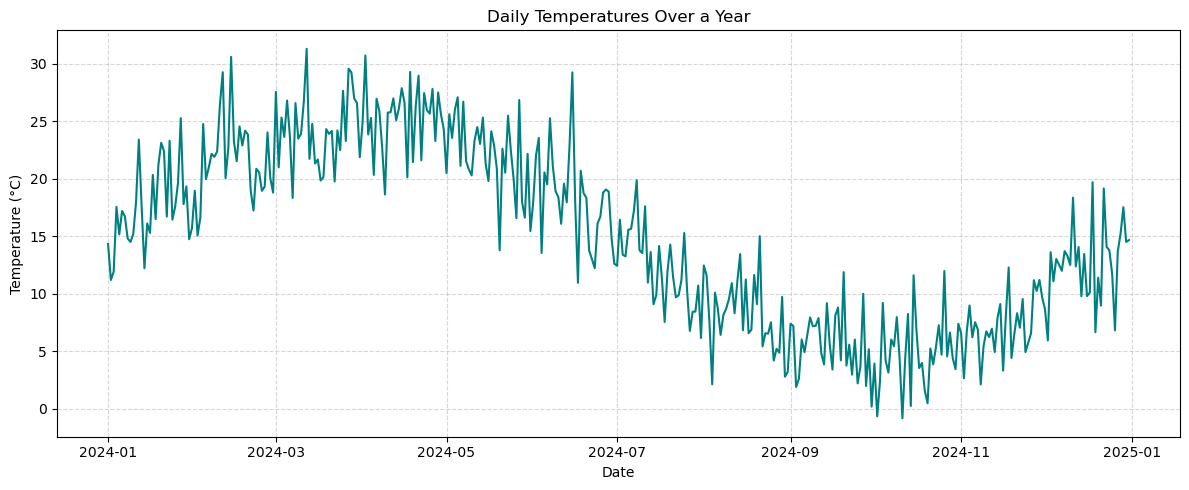

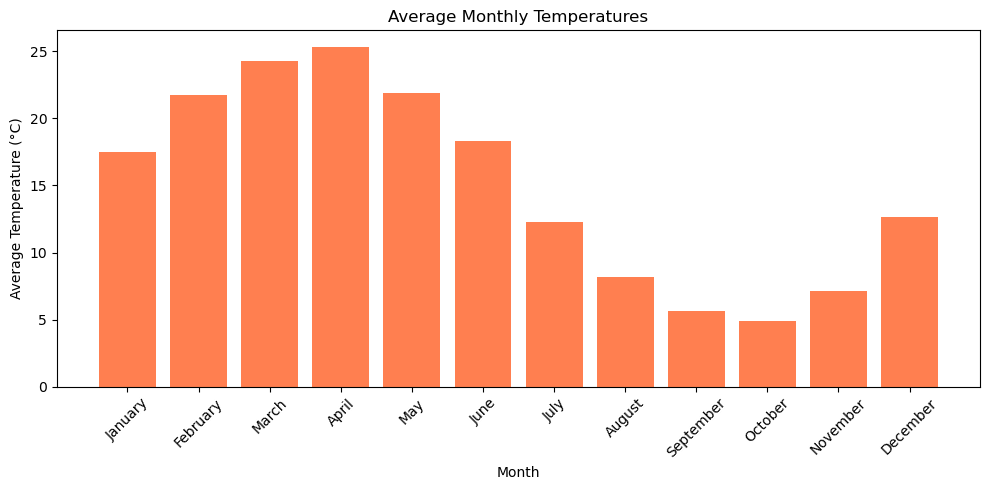

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a date range for one year (2024 is a leap year, use 365 days if needed)
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Simulate temperature data with seasonal variation (sinusoidal wave + noise)
days = np.arange(len(date_range))
base_temp = 15 + 10 * np.sin(2 * np.pi * days / 365)  # seasonal pattern
noise = np.random.normal(loc=0, scale=3, size=len(date_range))  # random noise
temperature = base_temp + noise

# Create DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'Temperature (°C)': temperature
})

df.set_index('Date', inplace=True)

# Summary statistics
print("Summary Statistics:")
print(df['Temperature (°C)'].describe(), "\n")

# Monthly average temperatures
df['Month'] = df.index.month_name()
monthly_avg = df.groupby('Month')['Temperature (°C)'].mean()

# Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

# Visualization: Line plot of daily temperatures
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Temperature (°C)'], color='teal')
plt.title('Daily Temperatures Over a Year')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Visualization: Bar plot of monthly averages
plt.figure(figsize=(10, 5))
plt.bar(monthly_avg.index, monthly_avg.values, color='coral')
plt.title('Average Monthly Temperatures')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
